## Clustering: kaggle Social Network Ads Dataset
https://www.kaggle.com/rakeshrau/social-network-ads

** Dataset Information: **

400 users purchased/not purchased a particular product

** Attribute Information: (4 features and 1 class) **

- User ID
- Gender
- Age
- EstimatedSalary
- Purchased

** Objective of this project **

Cluster users into two groups (Purchased of not) based on two features (Age and Salary)

# Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
# Load Data
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
# Inspect Data
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

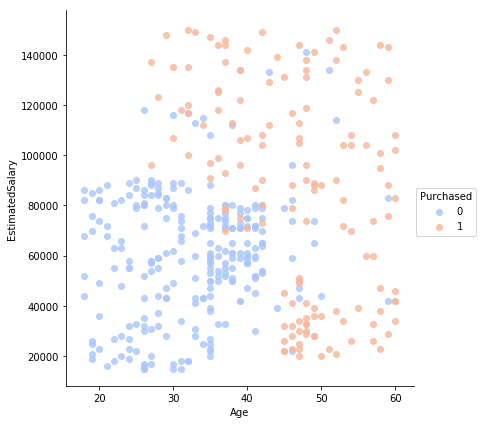

In [4]:
sns.lmplot('Age','EstimatedSalary',data=df, hue='Purchased',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [5]:
# features
X = df[['Age','EstimatedSalary']].values
X.shape

(400, 2)

# 1. K Means Clustering

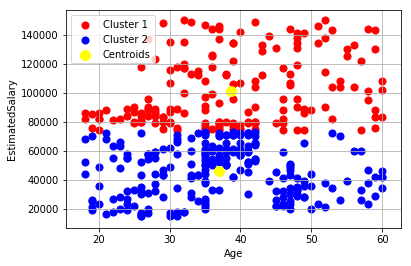

In [7]:
# Fit K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.grid()
plt.legend()

# 2. Hierarchical Clustering

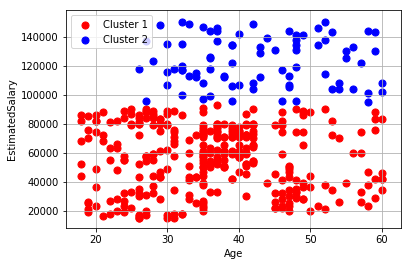

In [8]:
# Fit hc to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.grid()
plt.legend()